# Hypothesis: There are more computer science majors/minors in COMP 110 than there are students with prior coding experience.

## First, I will read the csv and convert it into a column-oriented table.

In [26]:
%reload_ext autoreload
%autoreload 2
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')

columns: dict[str, list[str]] = columnar(data_rows)


## The comp_major and prior_exp columns are what I will analyze. Here, I will select the comp_major column from the csv. Here are the first 10 responses.

In [27]:
from data_utils import head, select
subset: dict[str, list[str]] = select(columns, ["comp_major"])
comp_major_dict = head(subset, 573)
comp_dict_10 = head(subset, 10)
print(comp_dict_10)

{'comp_major': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']}


## Next, I will select the prior_exp column from the csv. Here are the first 10 responses.

In [28]:
subset: dict[str, list[str]] = select(columns, ["prior_exp"])
prior_exp_dict = head(subset, 573)
prior_dict_10 = head(subset, 10)
print(prior_dict_10)

{'prior_exp': ['None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'Over 2 years', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!']}


## I will use a helper function to filter out non-computer science majors, as these responses are irrelevant to the analysis.

In [29]:
from data_utils import filter

new_comp_dict: dict[str, list[str]] = filter(comp_major_dict, "No", "comp_major")
print(new_comp_dict)

['Yes - Minor', 'Yes - BS', 'Yes - Minor', 'Yes - Minor', 'Yes - Minor', 'Yes - Minor', 'Yes - Minor', 'Yes - BA', 'Yes - Minor', 'Yes - Minor', 'Yes - BS', 'Yes - BA', 'Yes - BA', 'Yes - Minor', 'Yes - Minor', 'Yes - BA', 'Yes - Minor', 'Yes - Minor', 'Yes - BA', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BA', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BA', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Yes - BS', 'Ye

## I will use the same helper function to filter out the responses that have no prior programming experience.

In [30]:
new_exp_dict: dict[str, list[str]] = filter(prior_exp_dict, "None to less than one month!", "prior_exp")
print(new_exp_dict)

['Over 2 years', '2-6 months', '7-12 months', '2-6 months', '7-12 months', '2-6 months', '2-6 months', '2-6 months', '1-2 years', '2-6 months', '7-12 months', '2-6 months', '2-6 months', '7-12 months', '1-2 years', '2-6 months', '2-6 months', '2-6 months', '1-2 years', '1-2 years', '2-6 months', 'Over 2 years', '7-12 months', '2-6 months', '2-6 months', '7-12 months', '2-6 months', '2-6 months', '1-2 years', '2-6 months', '2-6 months', '1-2 years', '2-6 months', '2-6 months', 'Over 2 years', '2-6 months', '2-6 months', '2-6 months', '2-6 months', '7-12 months', '2-6 months', '7-12 months', '1-2 years', '7-12 months', '2-6 months', '2-6 months', '2-6 months', '7-12 months', 'Over 2 years', '2-6 months', '2-6 months', 'Over 2 years', '2-6 months', '1-2 years', '2-6 months', '1-2 years', 'Over 2 years', '7-12 months', '2-6 months', '2-6 months', '2-6 months', '2-6 months', '2-6 months', '2-6 months', '2-6 months', '2-6 months', '1-2 years', '7-12 months', '7-12 months', '7-12 months', '2-

## Now, I will count the numbers of students with prior programming experience and the numbers of students who are computer science majors/minors.

In [38]:
from data_utils import count

print(count(new_exp_dict))

print(count(new_comp_dict))

{'Over 2 years': 11, '2-6 months': 104, '7-12 months': 37, '1-2 years': 18}
{'Yes - Minor': 33, 'Yes - BS': 88, 'Yes - BA': 48}


## I will sum both of these numbers.

In [50]:
number_prior_exp: int = 11 + 104 + 37 + 18
number_comp_major: int = 33 + 88 + 48

print(f"There are {number_prior_exp} students in COMP 110 with prior programming experience.")
print(f"There are {number_comp_major} students in COMP 110 studying computer science (B.S., B.A., or minor).")

There are 170 students in COMP 110 with prior programming experience.
There are 169 students in COMP 110 studying computer science (B.S., B.A., or minor).


## I created two visuals for this data set using matplotlib.

<BarContainer object of 1 artists>

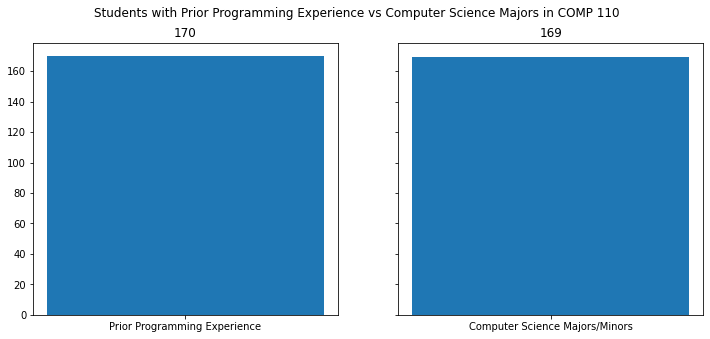

In [49]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Students with Prior Programming Experience vs Computer Science Majors in COMP 110")


axes[0].set_title("170")
axes[0].bar("Prior Programming Experience", number_prior_exp)

axes[1].set_title("169")
axes[1].bar("Computer Science Majors/Minors", number_comp_major)

## Conclusion
 ### The hypothesis that there are more computer science majors in COMP 110 than students with prior coding experience is disproved. The data analysis shows that these numbers are almost equal, which is something I did not expect to find. There are 169 computer science majors and 170 students with prior coding experience in COMP 110. One limitation of this data is that not all students in the course took this survey, so not every student in COMP 110 is accounted for. Another limitation is that this data was collected at the beginning of the semester, so the numbers of computer science majors/minors have likely changed since then.